In [1]:
from matplotlib import pyplot as plt
from display import display_structure
import numpy as np

from copy import deepcopy

631.7289264794292


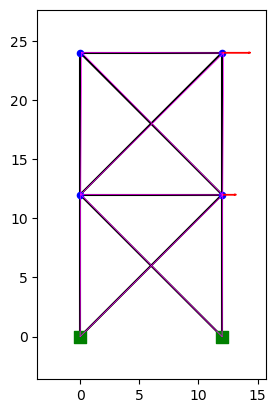

In [2]:
from MLP.structural.structure import SeismicStoriesTruss, StoriesTruss

params = {
    'n_stories': 2,
    'n_spans': 1,
    'height': 12.0,
    'width': 12.0,
}

for i in range(params['n_stories'] * (params['n_spans'] * 4 + 1)):
    params[f"A_{i}"] = .4
    params[f"E_{i}"] = 30.e9

params["P"] = 2000e3

# for i, j in enumerate(range((params['n_stories'] + 1) * params['n_spans'],
#                             (params['n_stories'] + 1) * (params['n_spans'] + 1))):
#     params[f"P_x_{j}"] = (1000e3 / (params['n_stories'] + 1)) * i

from MLP.structural.analysis import LinearAnalysis

struct = SeismicStoriesTruss()
struct.generate_model(params)
LinearAnalysis().run_analysis()

display_structure(def_scale=10)
print(8/np.max(struct.nodes_displacements))

Dataset saved to data/dataset/seismic_two_stories/train/data.hdf5
Dataset saved to data/dataset/seismic_two_stories/train/data.hdf5
Dataset saved to data/dataset/seismic_two_stories/train/data.hdf5


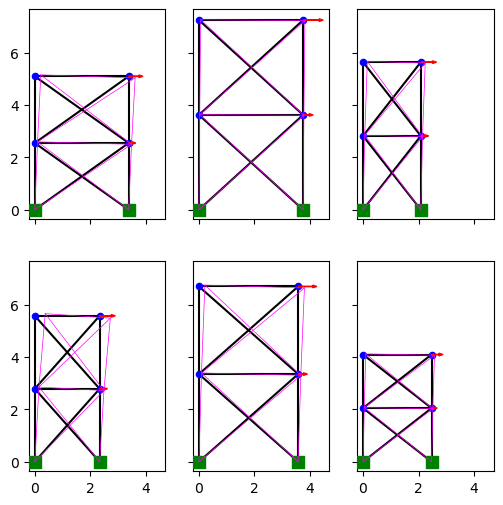

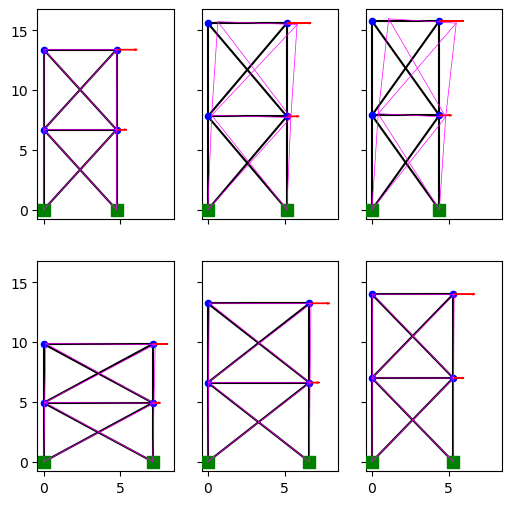

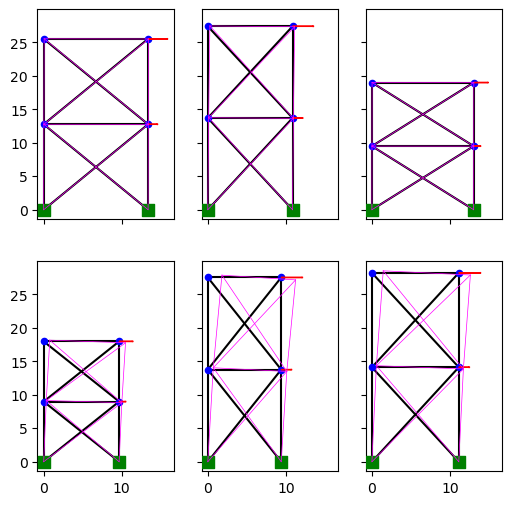

In [2]:
from MLP.dataset.generator import SeismicTwoStoriesTrussGenerator

path = "data/dataset/seismic_two_stories/train"

total_size = 50_000
remain = total_size
base_config = {
    'n_sample':-1,
    'parameters':{
        '__young__': {'distribution':'uniform', 'low':20e9, 'high':40e9}
    }
}

def plot(g):
    fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharex=True, sharey=True)
    for i, r in enumerate(g):
        display_structure(ax=axs[i // 3, i % 3], def_scale=20)
        if i >= 5: break

# Config 1
config = deepcopy(base_config)
config['n_sample'] = 2*total_size//14
remain -= 2*total_size//14
config['parameters']['height'] = {'distribution':'uniform', 'low':2, 'high':4}
config['parameters']['width'] = {'distribution':'uniform', 'low':2, 'high':4}
config['parameters']['P'] = {'distribution':'uniform', 'low':0, 'high':500e3}
config['parameters']['__area__'] = {'distribution':'uniform', 'low':0.01, 'high':0.04}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
g.save(path, append=False)

# Config 2
config = deepcopy(base_config)
config['n_sample'] = 4*total_size//14
remain -= 4*total_size//14
config['parameters']['height'] = {'distribution':'uniform', 'low':4, 'high':8}
config['parameters']['width'] = {'distribution':'uniform', 'low':4, 'high':8}
config['parameters']['P'] = {'distribution':'uniform', 'low':0, 'high':1000e3}
config['parameters']['__area__'] = {'distribution':'uniform', 'low':0.04, 'high':0.2}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
g.save(path, append=True)

# Config 3
config = deepcopy(base_config)
config['n_sample'] = 8*total_size//14
remain -= 8*total_size//14
config['n_sample'] += remain
config['parameters']['height'] = {'distribution':'uniform', 'low':8, 'high':16}
config['parameters']['width'] = {'distribution':'uniform', 'low':8, 'high':16}
config['parameters']['P'] = {'distribution':'uniform', 'low':0, 'high':2000e3}
config['parameters']['__area__'] = {'distribution':'uniform', 'low':0.1, 'high':0.04}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
g.save(path, append=True)


Dataset saved to data/dataset/seismic_two_stories/test/data.hdf5


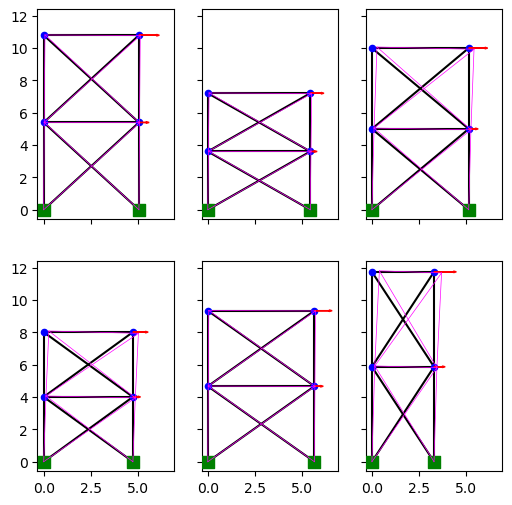

In [3]:
from MLP.dataset.generator import SeismicTwoStoriesTrussGenerator

path = "data/dataset/seismic_two_stories/test"

total_size = 10_000
remain = total_size
base_config = {
    'n_sample':-1,
    'parameters':{
        '__young__': {'distribution':'uniform', 'low':15e9, 'high':50e9}
    }
}

def plot(g):
    fig, axs = plt.subplots(2, 3, figsize=(6, 6), sharex=True, sharey=True)
    for i, r in enumerate(g):
        display_structure(ax=axs[i // 3, i % 3], def_scale=20)
        if i >= 5: break

# Config 1
config = deepcopy(base_config)
config['n_sample'] = total_size
config['parameters']['height'] = {'distribution':'uniform', 'low':3, 'high':6}
config['parameters']['width'] = {'distribution':'uniform', 'low':3, 'high':6}
config['parameters']['P'] = {'distribution':'uniform', 'low':100.e3, 'high':1000.e3}
config['parameters']['__area__'] = {'distribution':'uniform', 'low':0.01, 'high':0.2}

g = SeismicTwoStoriesTrussGenerator(config)
plot(g)
g.save(path, append=False)


In [1]:
from MLP.dataset import SeismicTwoStoriesTrussDatasetSingleTarget
path = "data/dataset/seismic_two_stories"
ds = SeismicTwoStoriesTrussDatasetSingleTarget(f"{path}/data.hdf5")
ds.__len__()

200000

In [2]:
from torch.utils.data import DataLoader
dl = DataLoader(ds, batch_size=5)

x,y,_,_,_ = dl.__iter__().__next__()

In [3]:
x

tensor([[ 2.1925e+00,  2.4885e+00,  3.3166e+00,  6.9110e-04,  3.1917e-04,
          1.5916e-03,  3.9497e-04,  7.2387e-04, -3.2751e-04,  1.6892e-03,
         -4.3648e-04,  1.1151e+05, -1.4562e-04, -3.4654e-05,  1.4932e-04,
          4.9604e-05, -1.3201e-05, -3.9292e-05, -9.8506e-05,  9.2709e-05,
         -7.5251e-05,  5.2236e-05],
        [ 3.3086e+00,  2.3583e+00,  4.0630e+00,  3.3517e-03,  1.3376e-03,
          8.6203e-03,  1.6905e-03,  3.4284e-03, -1.3567e-03,  8.7996e-03,
         -1.7736e-03,  2.0740e+05, -4.0479e-04, -1.0793e-04,  4.0953e-04,
          1.2469e-04, -3.3159e-05, -7.7111e-05, -2.1824e-04,  2.1037e-04,
         -1.5592e-04,  1.2990e-04],
        [ 3.1679e+00,  3.0285e+00,  4.3826e+00,  3.4229e-03,  1.5450e-03,
          8.2841e-03,  1.9283e-03,  3.5536e-03, -1.5792e-03,  8.6344e-03,
         -2.0886e-03,  3.6741e+05, -4.8829e-04, -1.2217e-04,  4.9789e-04,
          1.5950e-04, -4.3688e-05, -1.1655e-04, -3.0020e-04,  2.8456e-04,
         -2.2346e-04,  1.6650e-04],
    

## Cantilever

In [2]:
from dataset.generator import TenBarsCantileverTrussGenerator

Dataset saved to data/dataset/test/data.hdf5


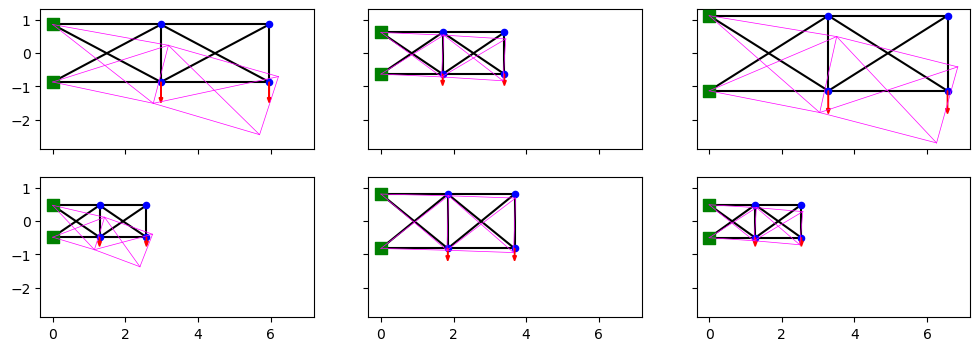

In [3]:
g = TenBarsCantileverTrussGenerator("data/config/cantilever_concrete.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/cantilever", append=False)

KeyboardInterrupt: 

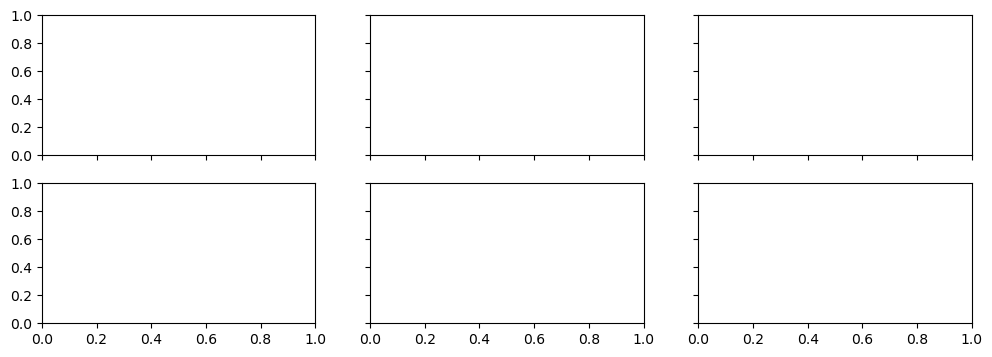

In [10]:
g = TenBarsCantileverTrussGenerator("data/config/cantilever_aluminum.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/cantilever", append=True)

KeyboardInterrupt: 

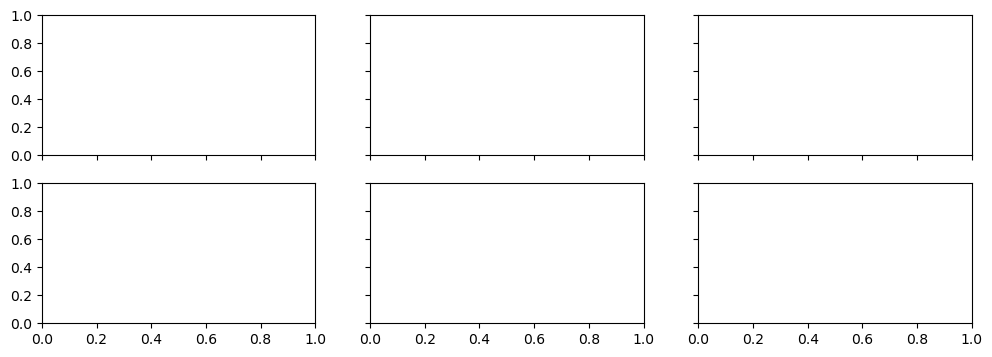

In [11]:
g = TenBarsCantileverTrussGenerator("data/config/cantilever_steel.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/cantilever", append=True)

## Beam

In [12]:
from dataset.generator import BiSupportedTrussBeamGenerator

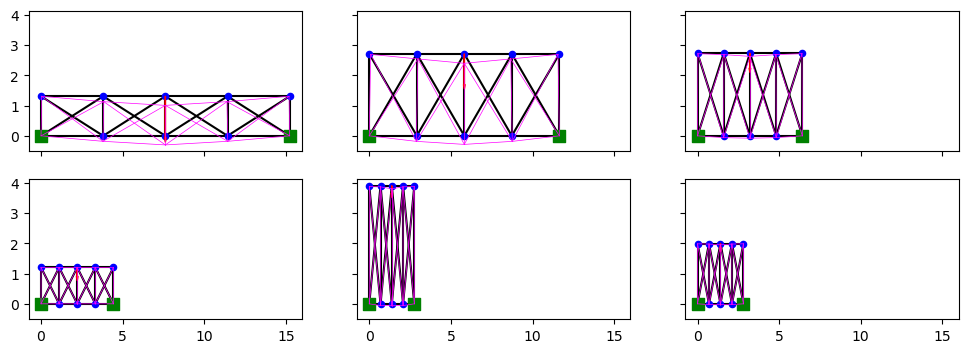

In [13]:
g = BiSupportedTrussBeamGenerator("data/config/beam_concrete.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/beam", append=False)

Dataset saved to data/dataset/beam/data.hdf5


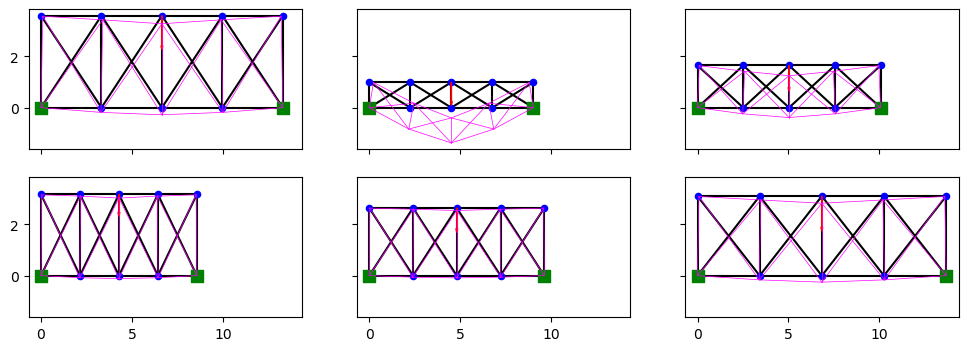

In [8]:
g = BiSupportedTrussBeamGenerator("data/config/beam_aluminum.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/beam", append=True)

Dataset saved to data/dataset/beam/data.hdf5


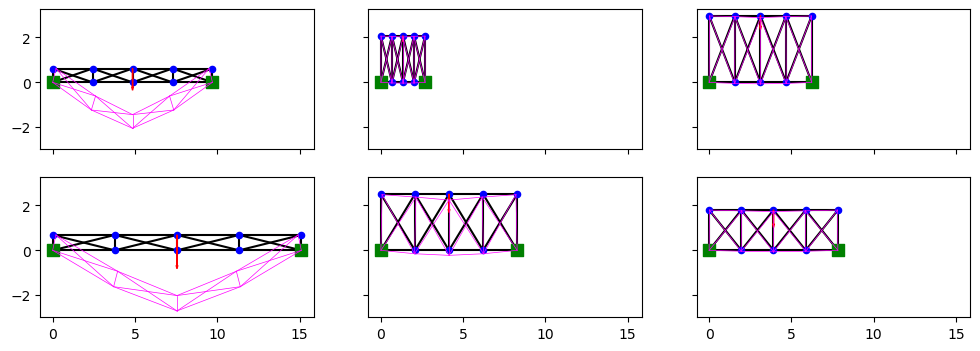

In [9]:
g = BiSupportedTrussBeamGenerator("data/config/beam_steel.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/beam", append=True)

## Triangle

In [18]:
from dataset.generator import TwoBarsTrussGenerator

In [22]:
print(g._TwoBarsTrussGenerator__structure.supports.__repr__())
print(g._TwoBarsTrussGenerator__structure.elements_connectivity.__repr__())

[[0, True, True], [1, False, False], [2, True, True]]
array([[0, 1],
       [1, 2]])


In [21]:
g._TwoBarsTrussGenerator__structure.__dir__()

['__module__',
 'generate_structure',
 '__doc__',
 '__abstractmethods__',
 '_abc_impl',
 'n_dof',
 'n_dim',
 '_get_r',
 '_compute_k_loc',
 'compute_k_loc',
 'compute_k_global',
 '_AbstractStructure__elements_length',
 'initial_elements_length',
 'deformed_elements_length',
 'supports',
 'n_nodes',
 'n_elements',
 'nodes_coordinates',
 'nodes_displacements',
 'elements_connectivity',
 'elements_forces',
 'loads',
 'stiffness_matrix',
 'generate_model',
 '__dict__',
 '__weakref__',
 '__slots__',
 '__new__',
 '__repr__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

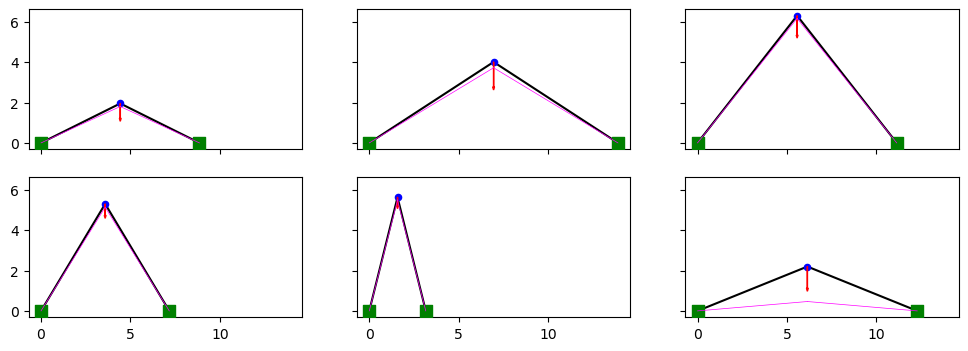

In [19]:
g = TwoBarsTrussGenerator("data/config/triangle_concrete.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

#g.save("data/dataset/triangle", append=False)

Dataset saved to data/dataset/triangle/data.hdf5


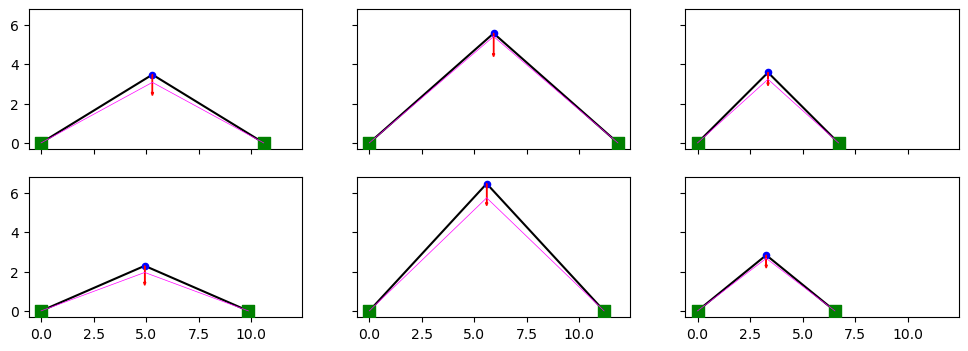

In [12]:
g = TwoBarsTrussGenerator("data/config/triangle_aluminum.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/triangle", append=True)

Dataset saved to data/dataset/triangle/data.hdf5


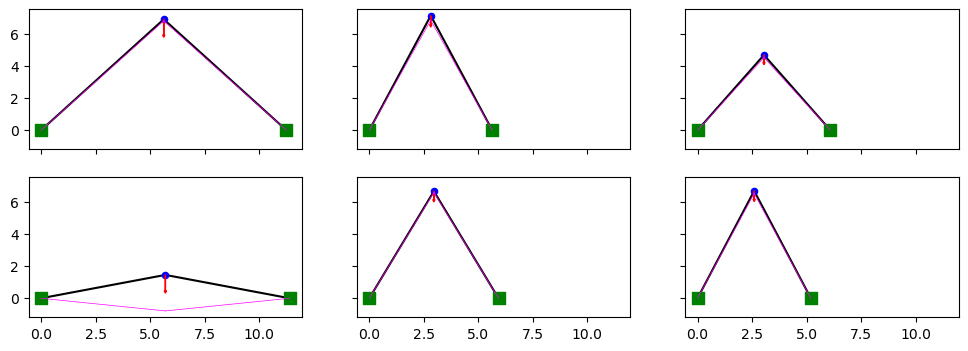

In [13]:
g = TwoBarsTrussGenerator("data/config/triangle_steel.yaml")

fig, axs = plt.subplots(2, 3, figsize=(12, 4), sharex=True, sharey=True)
for i, r in enumerate(g):
    display_structure(ax=axs[i // 3, i % 3], def_scale=20)
    if i >= 5: break

g.save("data/dataset/triangle", append=True)